In [ ]:
t1 = build_tree(new_df)
print(t1)

{'PAY_1': {-2: 0, -1: {'EDUCATION': {1: 0, 2: {'SEX': {1: 0, 2: 1}}}}, 0: {'PAY_3': {-2: 0, -1: 0, 0: 0, 2: 1}}, 1: 1, 2: {'EDUCATION': {1: 0, 2: 1}}, 3: 1}}


0.75
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.33      1.00      0.50         1

    accuracy                           0.75         8
   macro avg       0.67      0.86      0.67         8
weighted avg       0.92      0.75      0.79         8



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


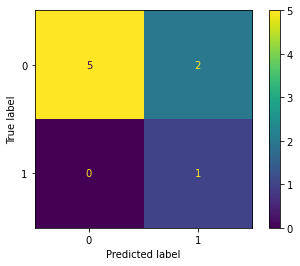

In [ ]:
f1 = list(new_df.columns)
f1.remove('DEFAULT')
x= new_df[f1]
y= new_df['DEFAULT']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33, random_state=8)
obj = DecisionTreeClassifier(random_state=20)
obj.fit(x_train,y_train)
test_pred = obj.predict(x_test)
print(metrics.accuracy_score(y_test,test_pred))
plot_confusion_matrix(obj,x_test,y_test,values_format='d')
print(classification_report(y_test,test_pred))

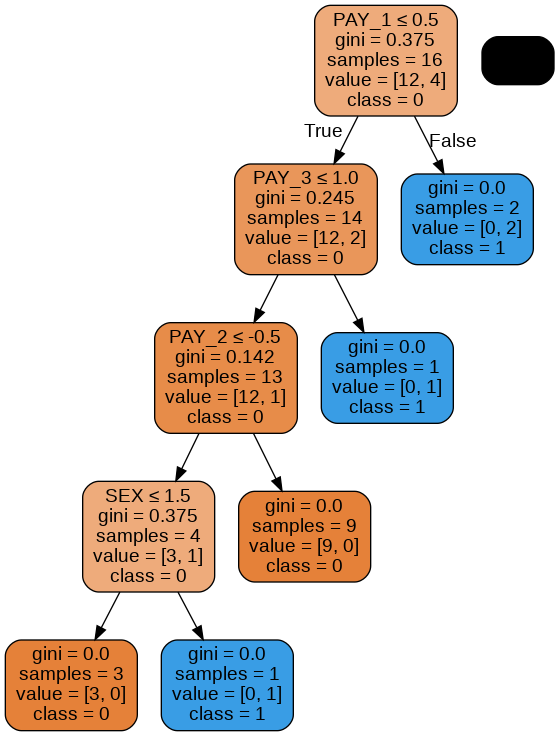

In [ ]:
dot_data= StringIO()
export_graphviz(obj,out_file=dot_data, filled = True, rounded = True, special_characters = True, feature_names = f1, class_names =['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('decision_tree.png')
Image(graph.create_png())

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

feature_columns = list(df.columns)
feature_columns.remove('DEFAULT')
feature_columns.remove('ID')

x = df[feature_columns]
y = df['DEFAULT']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 30)

# ADD YOUR CODE FROM HERE.
depth_accuracy = []
for i in range(1,21):
  dtree_p = DecisionTreeClassifier(max_depth=i)
  dtree_p.fit(x_train,y_train)
  dtree_pred = dtree_p.predict(x_test)
  depth_accuracy.append(metrics.accuracy_score(y_test,dtree_pred))
  print('Accuracy when max_depth = {0} is {1:.3f}'.format(i,metrics.accuracy_score(y_test,dtree_pred)))

Accuracy when max_depth = 1 is 0.823
Accuracy when max_depth = 2 is 0.823
Accuracy when max_depth = 3 is 0.824
Accuracy when max_depth = 4 is 0.822
Accuracy when max_depth = 5 is 0.818
Accuracy when max_depth = 6 is 0.819
Accuracy when max_depth = 7 is 0.816
Accuracy when max_depth = 8 is 0.812
Accuracy when max_depth = 9 is 0.813
Accuracy when max_depth = 10 is 0.807
Accuracy when max_depth = 11 is 0.805
Accuracy when max_depth = 12 is 0.797
Accuracy when max_depth = 13 is 0.798
Accuracy when max_depth = 14 is 0.788
Accuracy when max_depth = 15 is 0.784
Accuracy when max_depth = 16 is 0.777
Accuracy when max_depth = 17 is 0.771
Accuracy when max_depth = 18 is 0.766
Accuracy when max_depth = 19 is 0.760
Accuracy when max_depth = 20 is 0.758


In [ ]:
d1 = DecisionTreeClassifier(max_depth=3, random_state=20)
d1.fit(x_train,y_train)
d1_pred = d1.predict(x_test)

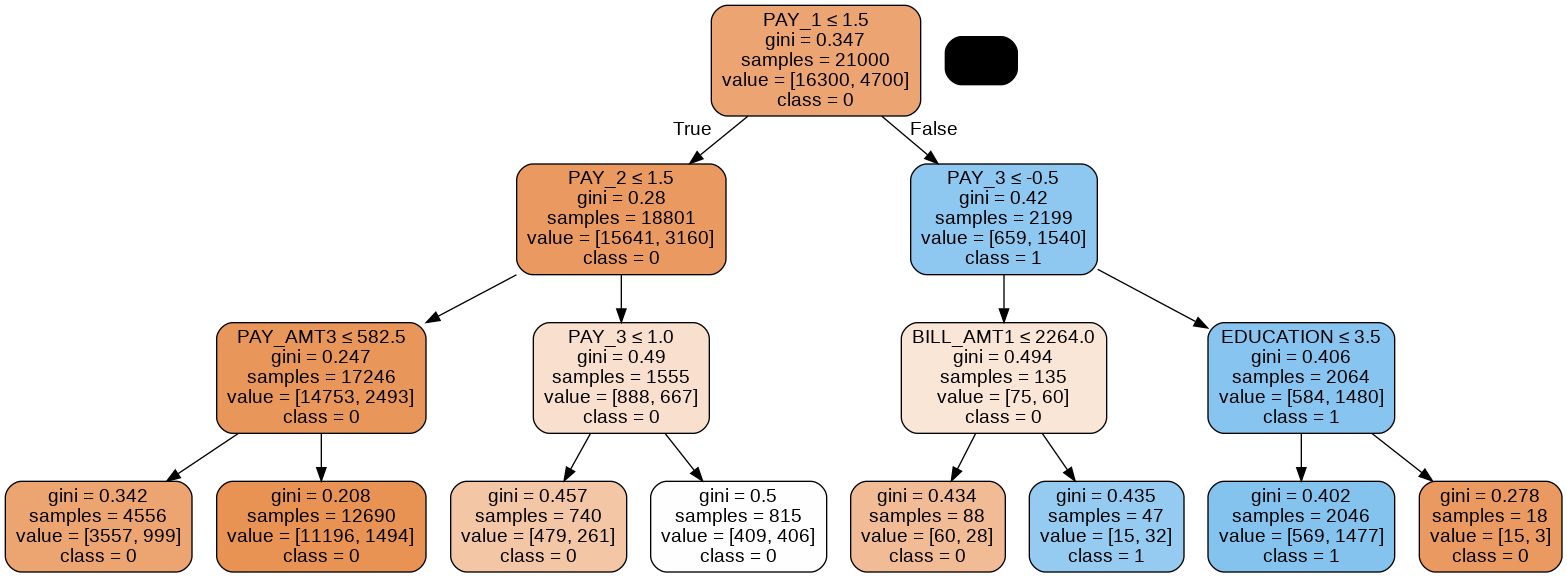

In [ ]:
dot_data= StringIO()
export_graphviz(d1,out_file=dot_data, filled = True, rounded = True, special_characters = True, feature_names = feature_columns, class_names =['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('decision_tree.png')
Image(graph.create_png())

In [ ]:
print(metrics.classification_report(y_test,d1_pred))


              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7064
           1       0.70      0.32      0.44      1936

    accuracy                           0.82      9000
   macro avg       0.77      0.64      0.67      9000
weighted avg       0.81      0.82      0.80      9000



In [ ]:
from sklearn.model_selection import GridSearchCV
p_grid = {'criterion':['gini','entropy'],'max_depth':np.arange(1,10),'min_samples_split':np.arange(5,10),'min_samples_leaf':np.arange(5,10), 'random_state':[20]}
mod = GridSearchCV(DecisionTreeClassifier(),p_grid,scoring='accuracy',n_jobs=-1)
mod.fit(x_train,y_train)
print(mod.best_estimator_)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=5,
                       random_state=20)


              precision    recall  f1-score   support

           0       0.85      0.95      0.89      7064
           1       0.65      0.37      0.47      1936

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


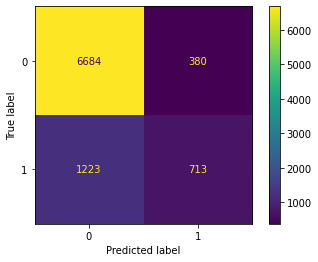

In [ ]:
dtc = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=5, random_state=20)
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)
plot_confusion_matrix(dtc,x_test,y_test,values_format='d')
print(classification_report(y_test,pred_dtc))

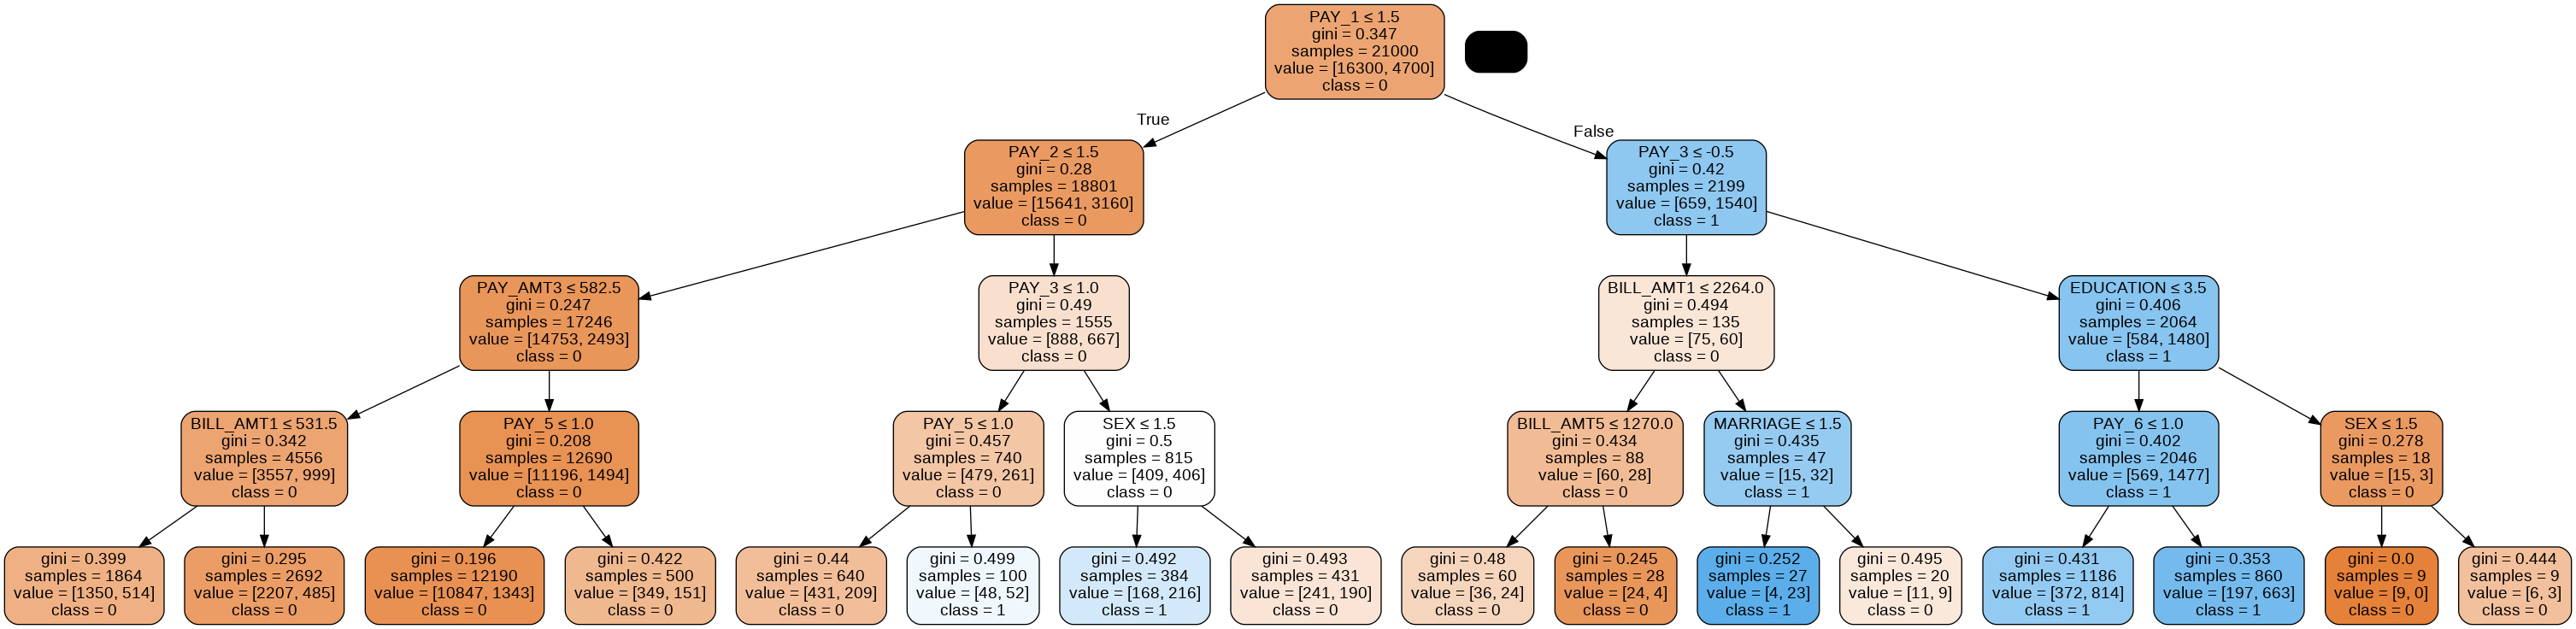

In [ ]:
dot_data= StringIO()
export_graphviz(dtc,out_file=dot_data, filled = True, rounded = True, special_characters = True, feature_names = feature_columns, class_names =['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('decision_tree.png')
Image(graph.create_png())

---